# **LSTM Sentiment analysis model for AMZN prices**


**The previous notebooks just predicted stock prices and then movement of stock pries simply based on OHLCV data.**

**However like I said in the last notebook we can also use sentiments to analyse time series data**

In this notebook, we'll be looking at how to apply deep learning techniques to the task of sentiment analysis. Sentiment analysis can be thought of as the exercise of taking a sentence, paragraph, document, or any piece of natural language, and determining whether that text's emotional tone is positive, negative or neutral.




**I have followed this tutorial: https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948**




# **UNDERSTANDING SENTIMENTAL ANALYSIS FOR LSTMS(SKIP THIS PART IF YOU UNDERSTAND LSTMs)**


**Word Vectors**


In order to understand how deep learning can be applied, think about all the different forms of data that are used as inputs into machine learning or deep learning models. Convolutional neural networks use arrays of pixel values, logistic regression uses quantifiable features, and reinforcement learning models use reward signals. The common theme is that the inputs need to be scalar values, or matrices of scalar values. When you think of NLP tasks, however, a data pipeline like this may come to mind.

![alt text](https://d3ansictanv2wj.cloudfront.net/SentimentAnalysis-7e006116d2ee0f4aaac20adeaafeb945.png)

This kind of pipeline is problematic. There is no way for us to do common operations like dot products or backpropagation on a single string. Instead of having a string input, we will need to convert each word in the sentence to a vector.

![alt text](https://d3ansictanv2wj.cloudfront.net/SentimentAnalysis2-f7f6aa03063d6d1f95681012c025e724.png)

You can think of the input to the sentiment analysis module as being a 16 x D dimensional matrix.

We want these vectors to be created in such a way that they somehow represent the word and its context, meaning, and semantics. For example, we’d like the vectors for the words “love” and “adore” to reside in relatively the same area in the vector space since they both have similar definitions and are both used in similar contexts. The vector representation of a word is also known as a word embedding.

![alt text](https://d3ansictanv2wj.cloudfront.net/SentimentAnalysis8-3eddd84998fb1306a1f8ebd0fee76f1c.png)

Word2Vec

In order to create these word embeddings, we'll use a model that's commonly reffered to as "Word2Vec". Without going into too much detail, the model creates word vectors by looking at the context with which words appear in sentences. Words with similar contexts will be placed close together in the vector space. In natural language, the context of words can be very important when trying to determine their meanings. Taking our previous example of the words "adore" and "love", consider the types of sentences we'd find these words in.

![alt text](https://d3ansictanv2wj.cloudfront.net/SentimentAnalysis9-ded73aafb74aeaba5fc8aeecad435825.png)

From the context of the sentences, we can see that both words are generally used in sentences with positive connotations and generally precede nouns or noun phrases. This is an indication that both words have something in common and can possibly be synonyms. Context is also very important when considering grammatical structure in sentences. Most sentences will follow traditional paradigms of having verbs follow nouns, adjectives precede nouns, and so on. For this reason, the model is more likely to position nouns in the same general area as other nouns. The model takes in a large dataset of sentences (English Wikipedia for example) and outputs vectors for each unique word in the corpus. The output of a Word2Vec model is called an embedding matrix.

![alt text](https://d3ansictanv2wj.cloudfront.net/SentimentAnalysis3-9dfc6939367c31e13792792adad5f059.png)

This embedding matrix will contain vectors for every distinct word in the training corpus. Traditionally, embedding matrices can contain over 3 million word vectors.

The Word2Vec model is trained by taking each sentence in the dataset, sliding a window of fixed size over it, and trying to predict the center word of the window, given the other words. Using a loss function and optimization procedure, the model generates vectors for each unique word. The specifics of this training procedure can get a little complicated, so we’re going to skip over the details for now, but the main takeaway here is that inputs into any Deep Learning approach to an NLP task will likely have word vectors as input.

Now that we have our word vectors as input, let's look at the actual network architecture we're going to be building. The unique aspect of NLP data is that there is a temporal aspect to it. Each word in a sentence depends greatly on what came before and comes after it. In order to account for this dependency, we use a recurrent neural network.

The recurrent neural network structure is a little different from the traditional feedforward NN you may be accostumed to seeing. The feedforward network consists of input nodes, hidden units, and output nodes.


The main difference between feedforward neural networks and recurrent ones is the temporal aspect of the latter. In RNNs, each word in an input sequence will be associated with a specific time step. In effect, the number of time steps will be equal to the max sequence length.

![alt text](https://d3ansictanv2wj.cloudfront.net/SentimentAnalysis3-9dfc6939367c31e13792792adad5f059.png)

Associated with each time step is also a new component called a hidden state vector ht. From a high level, this vector seeks to encapsulate and summarize all of the information that was seen in the previous time steps. Just like xt is a vector that encapsulates all the information of a specific word, ht is a vector that summarizes information from previous time steps.


Long Short Term Memory Units (LSTMs)
Long Short Term Memory Units are modules that you can place inside of reucrrent neural entworks. At a high level, they make sure that the hidden state vector h is able to encapsulate information about long term dependencies in the text. This approach won't be able to effectively connect together information that is separated by more than a couple time steps. We can illiustrate this idea of handling long term dependencies through an example in the field of question answering. The function of question answering models is to take an a passage of text, and answer a question about its content. Let's look at the following example.

![alt text](https://d3ansictanv2wj.cloudfront.net/SentimentAnalysis4-c49af0618fb3da699505e2e93ef8a92a.png)

Here, we see that the middle sentence had no impact on the question that was asked. However, there is a strong connection between the first and third sentences. With a classic RNN, the hidden state vector at the end of the network might have stored more information about the dog sentence than about the first sentence about the number. Basically, the addition of LSTM units make it possible to determine the correct and useful information that needs to be stored in the hidden state vector.

Looking at LSTM units from a more technical viewpoint, the units take in the current word vector xt and output the hidden state vector ht. In these units, the formulation for ht will be a bit more complex than that in a typical RNN. The computation is broken up into 4 components, an input gate, a forget gate, an output gate, and a new memory container.

![alt text](https://d3ansictanv2wj.cloudfront.net/SentimentAnalysis10-5355aeffa295ce537c5a5b3a1cd7034b.png)


Each gate will take in xt and ht-1 (not shown in image) as inputs and will perform some computation on them to obtain intermediate states. Each intermediate state gets fed into different pipelines and eventually the information is aggregated to form ht. For simplicity sake, we won't go into the specific formulations for each gate, but it's worth noting that each of these gates can be thought of as different modules within the LSTM that each have different functions. The input gate determines how much emphasis to put on each of the inputs, the forget gate determines the information that we'll throw away, and the output gate determines the final ht based on the intermediate states. 




**METHODOLOGY APPLIED HERE:**


1.   Get the old Amazon dataset: I chose Amazon again becuase GE doesn't have a lot of social activity however Amazon has tons of it.
2.   Combine news, economic indicators and reddit sentiments and relate with the Amazon stock data 
3. Based on the closing price declare polarity of the sentiment and news.

4. Each closing stock has a polarity asociated with it. 

5. Based on this we can predict whether stock prices will go higher or lower ir stock price movement

6. After this create a model and then reload the model to use to predict data 

7. Based on this I have done a multiple day look-ahead model similar to the one day look ahead model


In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive

# This will prompt for authorization.
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from sklearn import preprocessing
from datetime import datetime, timedelta
import time
from collections import Counter
import os
os.chdir('..')

Using TensorFlow backend.


**Util Functions**

**I modified util functions present in https://github.com/omerbsezer/LSTM_RNN_Tutorials_with_Demo/blob/master/SentimentAnalysisProject/emo_utils.py**


In [0]:
def prettify_ax(ax):
                                         #make an axis pretty
    for spine in ax.spines.itervalues():
        spine.set_visible(False)
    ax.set_frameon=True
    ax.patch.set_facecolor('#eeeeef')
    ax.grid('on', color='w', linestyle='-', linewidth=1)
    ax.tick_params(direction='out')
    ax.set_axisbelow(True)
    
def simple_ax(figsize=(6,4), **kwargs):
    ''' single prettified axis '''
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, **kwargs)
    prettify_ax(ax)
    return fig, ax

def earliest_date_after(query_date, date_list):
                                                  # find the earliest date after a query date from ordered list of dates
    for i in range(len(date_list)):
        if query_date < date_list[i].date():
            return date_list[i].date()
    print '\nQUERY DATE ERROR WITH:', query_date, '\n'
    raise Exception('No values after query date')

def latest_date_before(query_date, date_list):
                                                # find the latest date before a query date from ordered list of dates
    for i in range(len(date_list)):
        if query_date < date_list[i].date():
            if i==0:
                print '\nQUERY DATE ERROR WITH:', query_date, '\n'
                raise Exception('No values before query date in list')
            return date_list[i-1].date()
        
def inv_price_transform(normalized_data, scaler):
                                                    # inverse from normalized price to raw price '''
    m = scaler.mean_[0]
    s = scaler.scale_[0]
    return s*np.array(normalized_data)+m

**The module below preps data after scraping data from different sentiment data and then putting it together. Load the csv files and then proceed to normalize the data**

**Code credit: https://github.com/axelnine/Sentiment-Analysis/blob/master/Sentiment_Analysis.py**

**I have adapted the code to add in more files and then merge it**



In [5]:
def sent_data(ticker,
              stck = 'content/drive/My Drive/Colab Notebooks/data/stock/prices-split-adjusted.csv', \
              news_file = 'content/drive/My Drive/Colab Notebooks/data/news/', \
              econ_indicators = 'content/drive/My Drive/Colab Notebooks/data/market/economic_indicators.csv', \
              reddit_sent = 'content/drive/My Drive/Colab Notebooks/data/market/reddit_sentiments.csv'):
    #merge stock closing price data, sec filing data, and newspaper sentiment into one dataframe
    
    # load data
    stck_df = pd.read_csv(stck, index_col=0)
    stck_df = stck_df[stck_df.symbol==ticker].close
    stck_df.index = pd.to_datetime(stck_df.index)
    df_news = pd.read_csv(news_file+ticker+'.csv', index_col=0)
    df_news.index = pd.to_datetime(df_news.index)
    econ_df = pd.read_csv(econ_indicators, index_col=0)
    econ_df.index = pd.to_datetime(econ_df.index)
    reddit_df = pd.read_csv(reddit_sent, index_col=0)
    reddit_df.index = pd.to_datetime(reddit_df.index)
    return_df = pd.DataFrame(columns=[stck_df.name]+['stock_'+a for a in list(df_news.columns)]+\
                             list(econ_df.columns)+['market_'+a for a in list(reddit_df.columns)])
    
    # clip price data that doesn't have news coverage or reddit coverage
    d0, d1 = df_news.index[0].date(), df_news.index[1].date()
    startdate = d0-(d1-d0)
    stck_df = stck_df.loc[startdate:]
    
    # iterate through rows, aggregating all data and appending to return_df
    for row_num in range(stck_df.shape[0]):
        new_row = []
        stock_date = stck_df.index[row_num].date()
        new_row += [stck_df.iloc[row_num]]
        new_row += list(df_news.loc[earliest_date_after(stock_date, df_news.index),:])
        new_row += list(econ_df.loc[latest_date_before(stock_date, econ_df.index),:])
        new_row += list(reddit_df.loc[earliest_date_after(stock_date, reddit_df.index),:])
        return_df.loc[stock_date] = new_row
        if row_num % 100 == 0:
            print "%i/%i rows done." % (row_num, stck_df.shape[0]),
    print "\n%s dataframe prepped. %i timepoints, each with %i features." % \
          (ticker, return_df.shape[0], return_df.shape[1])
    return return_df

AMZN_df = sent_data('AMZN')

0/1385 rows done. 100/1385 rows done. 200/1385 rows done. 300/1385 rows done. 400/1385 rows done. 500/1385 rows done. 600/1385 rows done. 700/1385 rows done. 800/1385 rows done. 900/1385 rows done. 1000/1385 rows done. 1100/1385 rows done. 1200/1385 rows done. 1300/1385 rows done. 
AMZN dataframe prepped. 1385 timepoints, each with 14 features.


In [6]:
# display head of X dataframe
AMZN_df.head()

,close,stock_polarity,stock_subjectivity,stock_pos,stock_neg,stock_neu,CCI,BCI,CLI,market_neg,market_neu,market_pos,market_polarity,market_subjectivity
2011-07-01,209.490005,0.010839,0.144678,0.135308,0.018564,0.846128,100.2165,100.1154,99.40932,0.160768,0.184508,0.060792,0.002803,0.225319
2011-07-05,213.190002,0.010839,0.144678,0.135308,0.018564,0.846128,100.2165,100.1154,99.40932,0.160768,0.184508,0.060792,0.002803,0.225319
2011-07-06,214.190002,0.010839,0.144678,0.135308,0.018564,0.846128,100.2165,100.1154,99.40932,0.160768,0.184508,0.060792,0.002803,0.225319
2011-07-07,216.740005,0.010839,0.144678,0.135308,0.018564,0.846128,100.2165,100.1154,99.40932,0.160768,0.184508,0.060792,0.002803,0.225319
2011-07-08,218.279999,0.010839,0.144678,0.135308,0.018564,0.846128,100.2165,100.1154,99.40932,0.148376,0.175877,0.035888,-0.002623,0.260906


**Different polarities show how favourable the closing price is**

**The rest of the prediction process is the same. The data is normalized then broken into test and train. The testing model is then used to find the prediction model. Finally the predicton model is loaded and forecasting is done**

In [0]:
# scale data and split into training/test sets 
def load_stock(df, lookback=25):
    
    data = df.values
    n_train = list(df.index).index(df.index[-1]+timedelta(-365))
    scaler = preprocessing.StandardScaler() #normalize mean-zero, unit-variance
    scaler.fit(data[:n_train,:])
    data = scaler.transform(data)
    dataX, dataY = [], []
    for timepoint in range(data.shape[0]-lookback):
        dataX.append(data[timepoint:timepoint+lookback,:])
        dataY.append(data[timepoint+lookback,0])
    X_train, X_test = dataX[:n_train], dataX[n_train:]
    y_train, y_test = dataY[:n_train], dataY[n_train:]
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), scaler

# load practice stock, AMZN
lookback = 25
X_train, y_train, X_test, y_test, scaler = load_stock(df=AMZN_df, lookback=lookback)

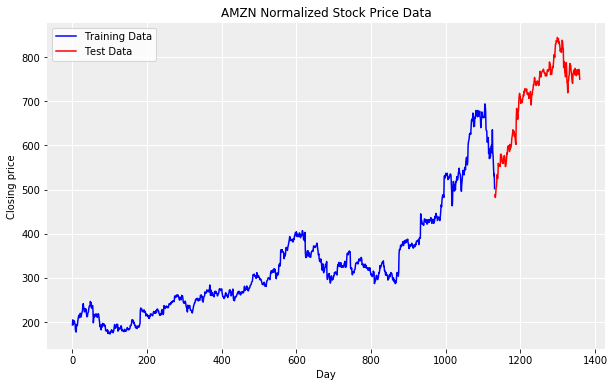

In [8]:
# normalize training and test price data and plot
#print(%i training examples, %i test examples" % (len(y_train), len(y_test)))

f,a = simple_ax(figsize=(10,6))
a.plot(range(len(y_train)), inv_price_transform(y_train, scaler), c='b', label='Training Data')
a.plot(range(len(y_train),len(y_test)+len(y_train)), inv_price_transform(y_test, scaler), c='r', label='Test Data')
a.set_title('AMZN Normalized Stock Price Data')
a.set_xlabel('Day')
a.set_ylabel('Closing price')
plt.legend()
plt.show()

Code from keras documentation: 

https://keras.io/getting-started/sequential-model-guide/

In [9]:
#TRAIN LSTM FOR AMZN DATA

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
#model.add(Dense(32, kernel_initializer="uniform", activation='relu'))        
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

W0813 17:43:08.498357 140238263302016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 17:43:08.510375 140238263302016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 17:43:08.517601 140238263302016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 17:43:08.787050 140238263302016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0813 17:43:08.797858 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25, 128)           73216     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 204,929
Trainable params: 204,929
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fit model
t0 = time.time()
history = model.fit(
            X_train,
            y_train,
            batch_size=512,
            epochs=200,
            validation_split=0.05,
            verbose=0)

In [0]:
##### SAVE MODEL #####
'''
model0 : 12/3/2017 (incomplete data)
model1 : 12/4/2017 (complete dataset)
'''
model.save('content/drive/My Drive/Colab Notebooks/data/model1.h5')

In [0]:
#PREDICT FUTURE PRICES

In [0]:
#### LOAD MODEL #####
model = load_model('content/drive/My Drive/Colab Notebooks/data/model1.h5')

RMSE:  1.7134309849064508


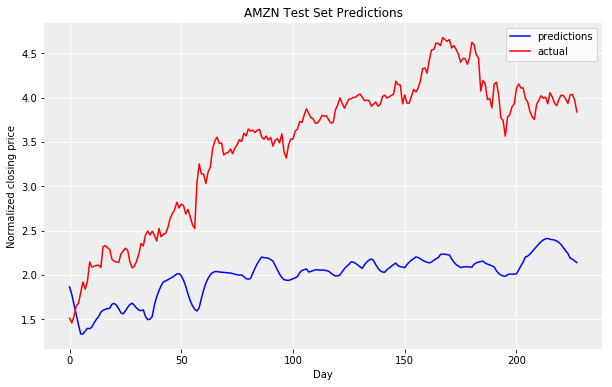

In [16]:
# predict test set
predictions = model.predict(X_test)
print "RMSE: ", np.sqrt(np.mean((predictions-y_test)**2))

f, a = simple_ax(figsize=(10,6))
a.plot(predictions, c='b', label='predictions')
a.plot(y_test, c='r', label='actual')
a.set_ylabel('Normalized closing price')
a.set_xlabel('Day')
a.set_title('AMZN Test Set Predictions')
plt.legend()
plt.show()


**PLOT ANALYSIS: THIS PLOT IS MUCH BETTER THAN THE PLOT IN THE 1ST LSTM NOTEBOOK WHERE THE TEST PRICES DID NOT FOLLOW THE TRAINING PRICES TREND. THIS SHOWS THAT SENTIMENT LIKE NEWS AND REDDIT HELP INDICATE THAT AMAZON STOCKS WERE MOVING UP**

**THE DIFFERENCE BETWEEN ACTUAL AND PREDICTED PRICE IS NORMALIZED DATA**

In [0]:
def predict_days(startday, days_topredict, data, model):
    ''' starting from startday predict days_topredict stock prices '''
    curr_data = data[startday,:,:]
    predictions = []
    for day in range(days_topredict):
        prediction = model.predict(curr_data.reshape(1,curr_data.shape[0],curr_data.shape[1]))[0][0]
        predictions.append(prediction)
        new_row = curr_data[-1,:]
        new_row[0] = prediction
        curr_data = np.vstack((curr_data[1:,:], new_row))
    return predictions

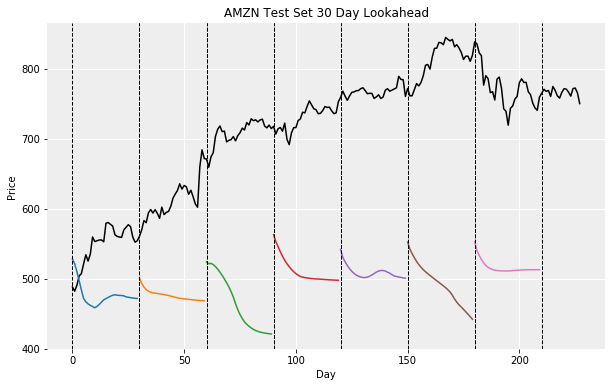

In [18]:
# predict multiple days in future and plot price projection path
days = 30
f, a = simple_ax(figsize=(10,6))
a.plot(inv_price_transform(y_test,scaler), c='k')
for segment in range(int(len(y_test)/days)):
    predictions = predict_days(segment*days, days, X_test, model)
    a.plot(range(segment*days, segment*days+days), inv_price_transform(predictions, scaler))
    a.axvline(segment*days, c='k', linestyle='dashed', linewidth=1)
    a.axvline(segment*days+days, c='k', linestyle='dashed', linewidth=1)
a.set_xlabel('Day')
a.set_ylabel('Price')
a.set_title('AMZN Test Set 30 Day Lookahead')
plt.show()

**Split the data into 30 days and try predicting the prices after every 30 days. Unfortunately there isnt any overlap in the data indicating that many day step ahead prediction models aren't great**

In [19]:
def _try_pred_true(startpoint, days_topredict, data, model, return_threshold):
    '''
    predict future prices and return a market decision
    - returns True: "buy long"
    - returns False: "sell short"
    - returns None: "do nothing"
    '''
    predictions = predict_days(startpoint, days_topredict, data, model)
    startprice, maxprice, minprice = predictions[0], max(predictions), min(predictions)
    buyreturn = (maxprice-startprice)/startprice
    sellreturn = (startprice-minprice)/startprice
    if buyreturn>=sellreturn and buyreturn>=return_threshold:
        return True
    elif sellreturn>buyreturn and sellreturn>=return_threshold:
        return False
    return None

def _true_dates_pred(data, model, return_threshold=.05, days_topredict=30):
    ''' walk data making buy/sell decisions '''
    true_dates, sell_dates = [], []
    for t in range(len(y_test)):
        decision = _try_pred_true(t, days_topredict, data, model, return_threshold)
        if decision is True:
            true_dates.append(t)
        elif decision is False:
            sell_dates.append(t)
        if t%20==0:
            print "%i/%i timepoints calculated." % (t+1,len(y_test)),
    print "Data walk complete."
    return true_dates, sell_dates

true_dates, sell_dates = _true_dates_pred(X_test, model, return_threshold=0.5, days_topredict=30)

#code ref: modified code from https://github.com/andi611/Stock-Buy-Sell-Dynamic-Programming-FinTech/blob/master/optimal_stock_action.py


1/228 timepoints calculated. 21/228 timepoints calculated. 41/228 timepoints calculated. 61/228 timepoints calculated. 81/228 timepoints calculated. 101/228 timepoints calculated. 121/228 timepoints calculated. 141/228 timepoints calculated. 161/228 timepoints calculated. 181/228 timepoints calculated. 201/228 timepoints calculated. 221/228 timepoints calculated. Data walk complete.


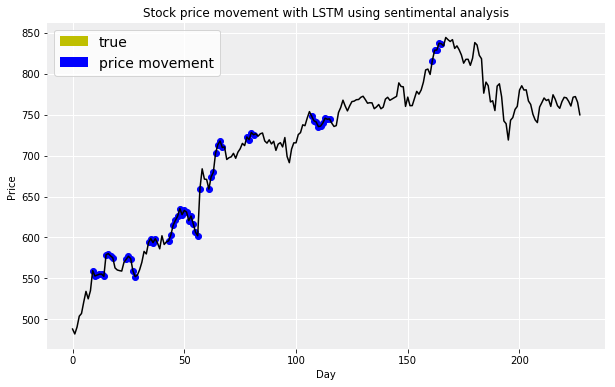

In [20]:
f,a = simple_ax(figsize=(10,6))
a.plot(inv_price_transform(y_test, scaler), c='k')
a.scatter(true_dates, inv_price_transform(y_test[true_dates],scaler), c='y')
a.scatter(sell_dates, inv_price_transform(y_test[sell_dates],scaler), c='b')
a.set_xlabel('Day')
a.set_ylabel('Price')
a.set_title('Stock price movement with LSTM using sentimental analysis')
recs = [mpatches.Rectangle((0,0),1,1,fc='y'), mpatches.Rectangle((0,0),1,1,fc='b')]
a.legend(recs,['true', 'price movement'], loc=2, prop={'size':14})
plt.show()

# Let's try modeling again by tuning the hyperparameters

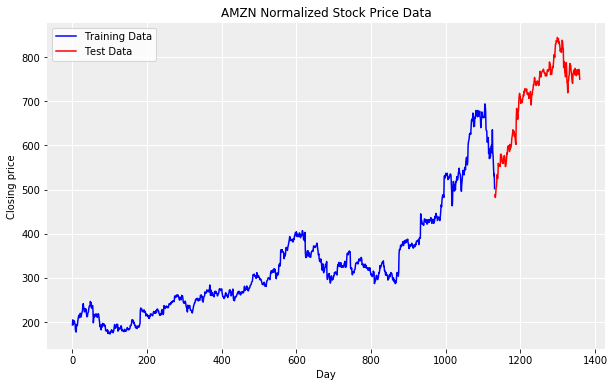

In [21]:
#1. normalize data again

f,a = simple_ax(figsize=(10,6))
a.plot(range(len(y_train)), inv_price_transform(y_train, scaler), c='b', label='Training Data')
a.plot(range(len(y_train),len(y_test)+len(y_train)), inv_price_transform(y_test, scaler), c='r', label='Test Data')
a.set_title('AMZN Normalized Stock Price Data')
a.set_xlabel('Day')
a.set_ylabel('Closing price')
plt.legend()
plt.show()

In [22]:
#change the hyper parameters and add layers

model = Sequential()
model.add(LSTM(256, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True)) #changed neurons
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))     
model.add(Dense(1, activation='relu')) #change activation function relu 
model.compile(loss='mae', optimizer='sgd') #keep  
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 25, 256)           277504    
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 256)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 474,753
Trainable params: 474,753
Non-trainable params: 0
_________________________________________________________________


In [0]:
# CHANGE BATCH SIZE TO 32, EPOCHS TO 100 AND SPLIT TO 0.00
t0 = time.time()
history = model.fit(
            X_train,
            y_train,
            batch_size=512,
            epochs=100,
            validation_split=0.05,
            verbose=0)

In [0]:
##### SAVE MODEL #####
'''
model0 : 12/3/2017 (incomplete data)
model1 : 12/4/2017 (complete dataset)
'''
model.save('content/drive/My Drive/Colab Notebooks/data/model1.h5')

In [0]:
#### LOAD MODEL #####
model = load_model('content/drive/My Drive/Colab Notebooks/data/model1.h5')

RMSE:  1.3086673165140557


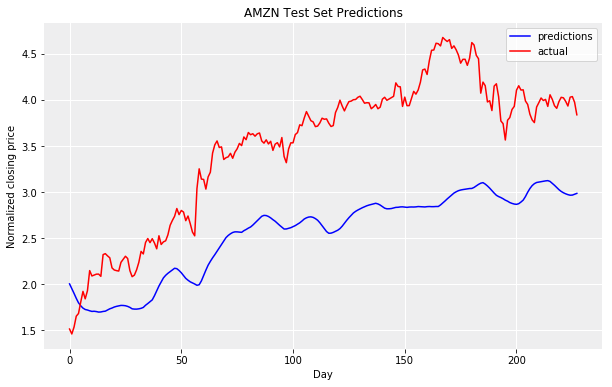

In [26]:
# predict test set
predictions = model.predict(X_test)
print "RMSE: ", np.sqrt(np.mean((predictions-y_test)**2))

f, a = simple_ax(figsize=(10,6))
a.plot(predictions, c='b', label='predictions')
a.plot(y_test, c='r', label='actual')
a.set_ylabel('Normalized closing price')
a.set_xlabel('Day')
a.set_title('AMZN Test Set Predictions')
plt.legend()
plt.show()


In [0]:
def predict_days(startday, days_topredict, data, model):
    ''' starting from startday predict days_topredict stock prices '''
    curr_data = data[startday,:,:]
    predictions = []
    for day in range(days_topredict):
        prediction = model.predict(curr_data.reshape(1,curr_data.shape[0],curr_data.shape[1]))[0][0]
        predictions.append(prediction)
        new_row = curr_data[-1,:]
        new_row[0] = prediction
        curr_data = np.vstack((curr_data[1:,:], new_row))
    return predictions

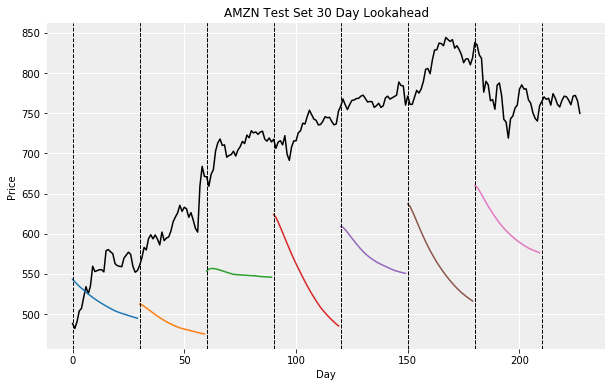

In [28]:
# predict multiple days in future and plot price projection path
days = 30
f, a = simple_ax(figsize=(10,6))
a.plot(inv_price_transform(y_test,scaler), c='k')
for segment in range(int(len(y_test)/days)):
    predictions = predict_days(segment*days, days, X_test, model)
    a.plot(range(segment*days, segment*days+days), inv_price_transform(predictions, scaler))
    a.axvline(segment*days, c='k', linestyle='dashed', linewidth=1)
    a.axvline(segment*days+days, c='k', linestyle='dashed', linewidth=1)
a.set_xlabel('Day')
a.set_ylabel('Price')
a.set_title('AMZN Test Set 30 Day Lookahead')
plt.show()

In [30]:
def _try_pred_true(startpoint, days_topredict, data, model, return_threshold):
    '''
    predict future prices and return a market decision
    - returns True: "buy long"
    - returns False: "sell short"
    - returns None: "do nothing"
    '''
    predictions = predict_days(startpoint, days_topredict, data, model)
    startprice, maxprice, minprice = predictions[0], max(predictions), min(predictions)
    buyreturn = (maxprice-startprice)/startprice
    sellreturn = (startprice-minprice)/startprice
    if buyreturn>=sellreturn and buyreturn>=return_threshold:
        return True
    elif sellreturn>buyreturn and sellreturn>=return_threshold:
        return False
    return None

def _true_dates_pred(data, model, return_threshold=.05, days_topredict=30):
    ''' walk data making buy/sell decisions '''
    true_dates, sell_dates = [], []
    for t in range(len(y_test)):
        decision = _try_pred_true(t, days_topredict, data, model, return_threshold)
        if decision is True:
            true_dates.append(t)
        elif decision is False:
            sell_dates.append(t)
        if t%20==0:
            print "%i/%i timepoints calculated." % (t+1,len(y_test)),
    print "Data walk complete."
    return true_dates, sell_dates

true_dates, sell_dates = _true_dates_pred(X_test, model, return_threshold=0.5, days_topredict=30)

#code ref: modified code from https://github.com/andi611/Stock-Buy-Sell-Dynamic-Programming-FinTech/blob/master/optimal_stock_action.py


1/228 timepoints calculated. 21/228 timepoints calculated. 41/228 timepoints calculated. 61/228 timepoints calculated. 81/228 timepoints calculated. 101/228 timepoints calculated. 121/228 timepoints calculated. 141/228 timepoints calculated. 161/228 timepoints calculated. 181/228 timepoints calculated. 201/228 timepoints calculated. 221/228 timepoints calculated. Data walk complete.


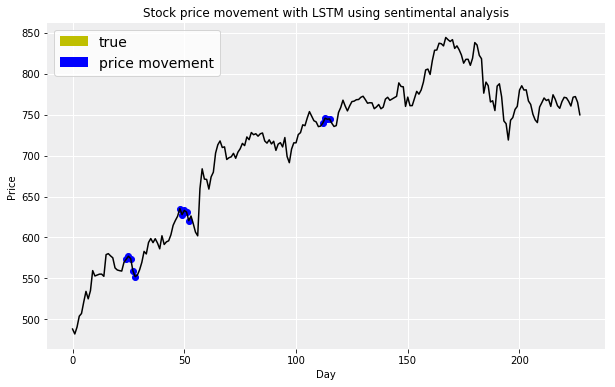

In [31]:
f,a = simple_ax(figsize=(10,6))
a.plot(inv_price_transform(y_test, scaler), c='k')
a.scatter(true_dates, inv_price_transform(y_test[true_dates],scaler), c='y')
a.scatter(sell_dates, inv_price_transform(y_test[sell_dates],scaler), c='b')
a.set_xlabel('Day')
a.set_ylabel('Price')
a.set_title('Stock price movement with LSTM using sentimental analysis')
recs = [mpatches.Rectangle((0,0),1,1,fc='y'), mpatches.Rectangle((0,0),1,1,fc='b')]
a.legend(recs,['true', 'price movement'], loc=2, prop={'size':14})
plt.show()